### Information Visualization - Group 7

Wij zijn Efe Karatas, Samim Amdam, Sunny Li en Sharjeel Mohammad 

**Introduction**

Veel studenten gamen in hun vrije tijd. Het is leuk, helpt om te ontspannen en kan stress verminderen. Maar er zijn ook zorgen. Sommige mensen denken dat gamen zorgt voor minder slaap, minder studietijd en slechtere cijfers.
In dit project kijken we of gamen invloed heeft op hoe goed studenten het doen op school. We gebruiken drie datasets met informatie over studenten, hun gametijd, studiegedrag en cijfers. We bekijken twee kanten van het verhaal. De ene kant zegt dat gamen goed is voor het welzijn van studenten. De andere kant zegt dat gamen juist slecht is voor hun studie.
Met duidelijke grafieken en gegevens willen we laten zien wanneer gamen kan helpen, en wanneer het misschien juist een probleem is. We zeggen niet dat gamen goed of slecht is, maar willen beter begrijpen wat de effecten kunnen zijn.



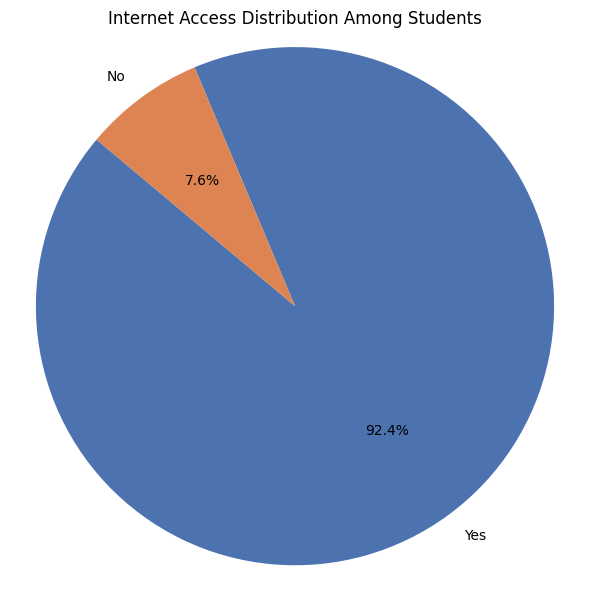

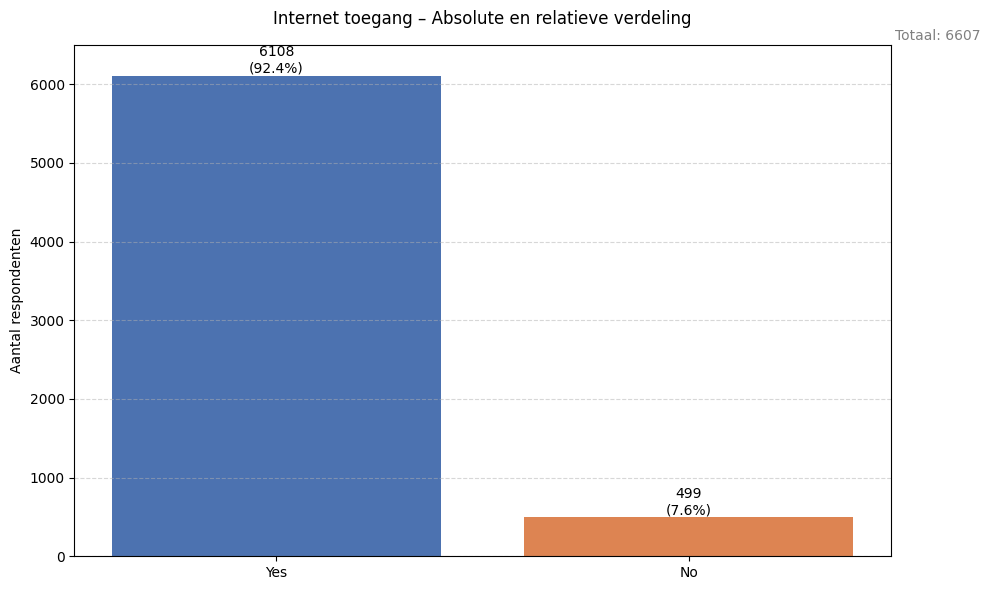

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. Data inladen ---
df = pd.read_csv("StudentPerformanceFactors.csv")  # Pas pad aan indien nodig

# Waardes tellen
value_counts = df['Internet_Access'].value_counts()
categories = value_counts.index.tolist()     # ['Yes', 'No']
counts = value_counts.values.tolist()        # [6108, 499]
total = sum(counts)
colors = ['#4c72b0', '#dd8452']              # optioneel

# --- 2. Pie chart ---
plt.figure(figsize=(6, 6))
plt.pie(
    counts,
    labels=categories,
    autopct='%1.1f%%',
    startangle=140,
    colors=colors
)
plt.title('Internet Access Distribution Among Students')
plt.axis('equal')
plt.tight_layout()
plt.show()

# --- 3. Staafdiagram met annotaties ---
plt.figure(figsize=(10, 6))
bars = plt.bar(categories, counts, color=colors)

# Dual annotation: hoogte + percentage
for bar in bars:
    height = bar.get_height()
    percentage = (height / total) * 100
    plt.text(bar.get_x() + bar.get_width()/2, height,
             f'{height}\n({percentage:.1f}%)',
             ha='center', va='bottom', linespacing=1.2)

# Titel en labels
plt.title('Internet toegang – Absolute en relatieve verdeling', pad=15)
plt.ylabel('Aantal respondenten')
plt.ylim(0, 6500)
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Referentielijn voor totaal
plt.axhline(y=total, color='gray', linestyle=':', alpha=0.5)
plt.text(1.5, total, f'Totaal: {total}', va='center', ha='left', color='gray')

plt.tight_layout()
plt.show()


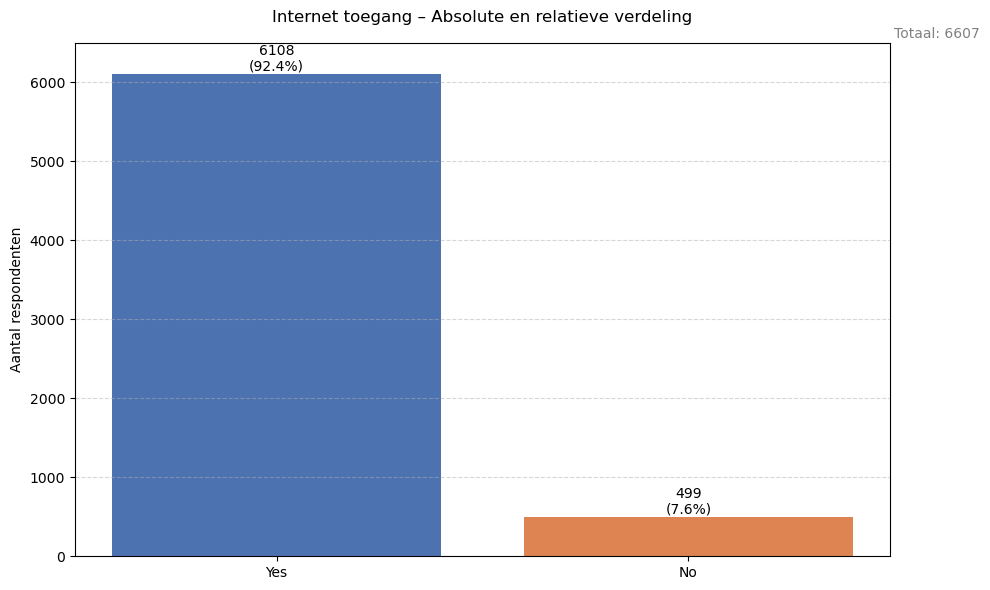

In [5]:
import matplotlib.pyplot as plt

# Waarden tellen
value_counts = df['Internet_Access'].value_counts()
categories = value_counts.index.tolist()
counts = value_counts.values.tolist()
total = sum(counts)
colors = ['#4c72b0', '#dd8452']  # optioneel

# Staafdiagram
plt.figure(figsize=(10, 6))
bars = plt.bar(categories, counts, color=colors)

# Dual annotation
for bar in bars:
    height = bar.get_height()
    percentage = (height / total) * 100
    plt.text(bar.get_x() + bar.get_width()/2, height,
             f'{height}\n({percentage:.1f}%)',
             ha='center', va='bottom', linespacing=1.2)

plt.title('Internet toegang – Absolute en relatieve verdeling', pad=15)
plt.ylabel('Aantal respondenten')
plt.ylim(0, 6500)
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Referentielijn
plt.axhline(y=total, color='gray', linestyle=':', alpha=0.5)
plt.text(1.5, total, f'Totaal: {total}', va='center', ha='left', color='gray')

plt.tight_layout()
plt.show()


C:\Users\12lis\AppData\Local\Temp\ipykernel_4488\629355353.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Gaming_num', data=df, ax=axes[0], palette='pastel')
C:\Users\12lis\AppData\Local\Temp\ipykernel_4488\629355353.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Preparation_num', data=df, ax=axes[1], palette='pastel')
C:\Users\12lis\AppData\Local\Temp\ipykernel_4488\629355353.py:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Attendance_num', data=df, ax=axes[2], palette='pastel')


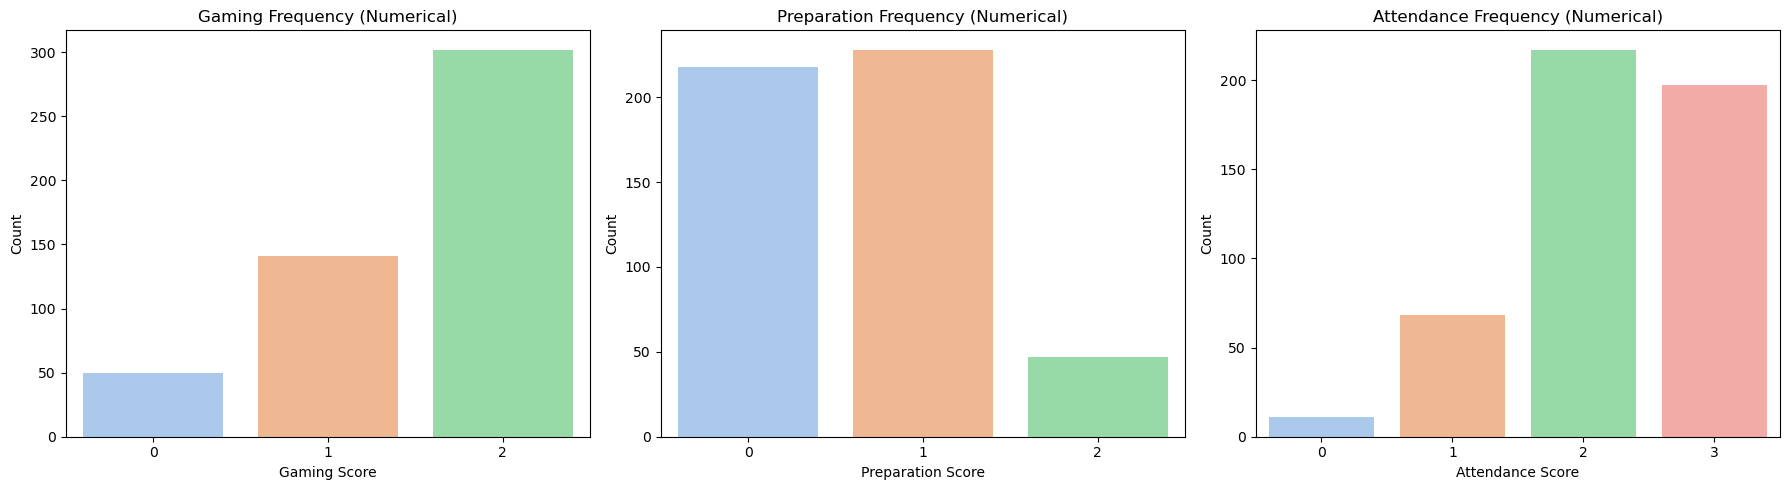

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data inladen
df = pd.read_csv("ResearchInformation3.csv")  # pas het pad aan indien nodig

# Mappings voor ordinal variabelen
prep_mapping = {
    "0-1 Hour": 0,
    "2-3 Hours": 1,
    "More than 3 Hours": 2,
    "More than 3 Hours ": 2  # met spatie
}

gaming_mapping = {
    "0-1 Hour": 0,
    "2-3 Hours": 1,
    "More than 3 Hours": 2
}

attendance_mapping = {
    "Below 40%": 0,
    "40%-59%": 1,
    "60%-79%": 2,
    "80%-100%": 3
}

# Toevoegen van numerieke kolommen
df['Preparation_num'] = df['Preparation'].map(prep_mapping)
df['Gaming_num'] = df['Gaming'].map(gaming_mapping)
df['Attendance_num'] = df['Attendance'].map(attendance_mapping)

# Plot: bar charts naast elkaar
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Gaming
sns.countplot(x='Gaming_num', data=df, ax=axes[0], palette='pastel')
axes[0].set_title('Gaming Frequency (Numerical)')
axes[0].set_xlabel('Gaming Score')
axes[0].set_ylabel('Count')

# Preparation
sns.countplot(x='Preparation_num', data=df, ax=axes[1], palette='pastel')
axes[1].set_title('Preparation Frequency (Numerical)')
axes[1].set_xlabel('Preparation Score')
axes[1].set_ylabel('Count')

# Attendance
sns.countplot(x='Attendance_num', data=df, ax=axes[2], palette='pastel')
axes[2].set_title('Attendance Frequency (Numerical)')
axes[2].set_xlabel('Attendance Score')
axes[2].set_ylabel('Count')

# Layout optimaliseren
plt.tight_layout()
plt.show()


In [ ]:
kljasdhfjkasdhjfkhadsjhfasdhfajdhsfjksd